In [1]:
import pandas as pd
import numpy as np
import datetime 

# plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 

plt.style.use('fivethirtyeight') #plot style used by fivethirtyeight
mpl.rcParams['figure.figsize'] = (12.0, 7.0)


In [2]:
df=pd.read_csv('../input/companies.csv')


In [3]:
df.head()

,name,vertical,year,batch,url,description
0,Clickfacts,B2B,2005,s2005,http://clickfacts.com,NaN
1,Kiko,Consumer,2005,s2005,http://kiko.com,We're the best online calendar solution to eve...
2,Loopt,Enterprise,2005,s2005,http://loopt.com,NaN
3,Parakey,Consumer,2005,s2005,http://parakey.com,NaN
4,Reddit,Consumer,2005,s2005,http://reddit.com,NaN


In [4]:
print "The total number of companies funded by YC since 2005:", df.shape[0]

The total number of companies funded by YC since 2005: 883


The dataset has very few columns so we don't have that many variables to observe.

## The number of companies funded per year

One interesting question is the number of companies that YC has funded each year of it's existence

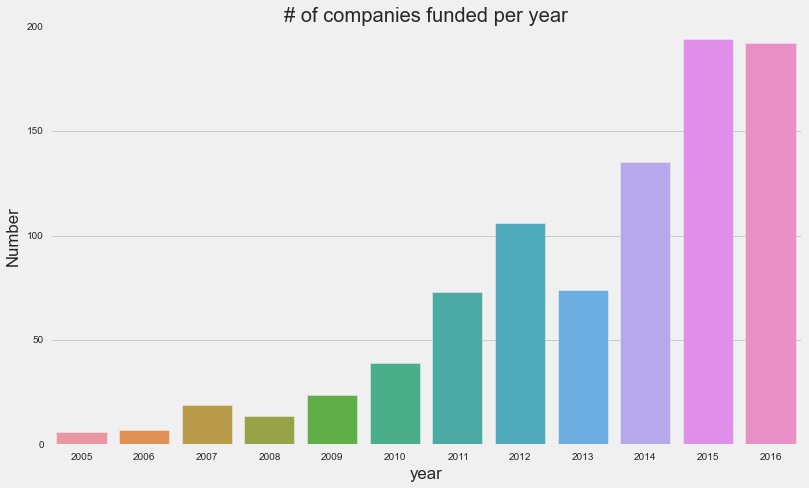

In [5]:
sns.countplot(df.year)
plt.title('# of companies funded per year')
plt.ylabel('Number')

Clearly we see that every year, there is an increase in the number of companies funded by YC. This is likely reflective of the ever increasing popularity of YC or more people interested in being entrepreneurs.

### We can also see the seasonal progression

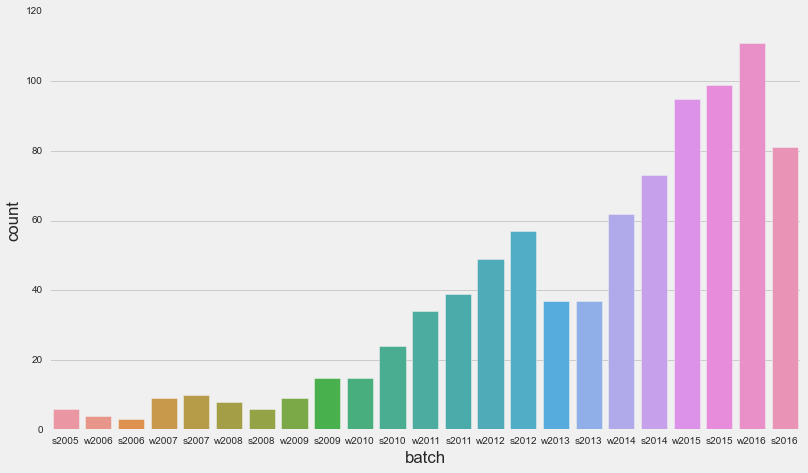

In [11]:
sns.countplot(df.batch)

## What type of company does YC fund?

First let's get a sense of the total number of industries/fields that YC is invested in

In [6]:
print "The total number of areas YC invests in", len(df.vertical.unique())

The total number of areas YC invests in 10


Now we need to get a sense of what those areas are

In [7]:
np.sort(df.vertical.unique())

array([nan, 'B2B', 'Biomedical', 'Consumer', 'Developer Tools',
       'Education', 'Enterprise', 'Fintech', 'Hardware', 'Marketplace'], dtype=object)

There's a category with data not available. Let's call that category 'others'.

In [8]:
df['vertical']=['others' if pd.isnull(x) else x for x in df['vertical']]

## How many companies in each field has YC invested in?

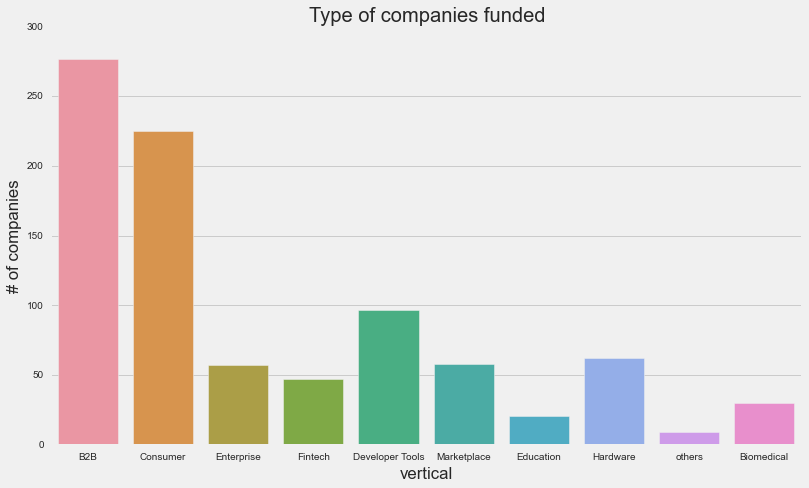

In [9]:
sns.countplot(df.vertical)
plt.title('Type of companies funded')
plt.ylabel('# of companies')

B2B and consumer products are by far the most popular sectors. If you an entreprenuer trying to get funding from YC, you should probably consider those two sectors. 

I'll like to know what percentage of the companies are B2B

In [10]:
print "B2B companies form" ,round((df['vertical']=='B2B').value_counts()[1]/float(len(df))*100),"% of YC portfolio"

B2B companies form 31.0 % of YC portfolio


### We can also get a sense of how the investment in each field has changed on a yearly basis

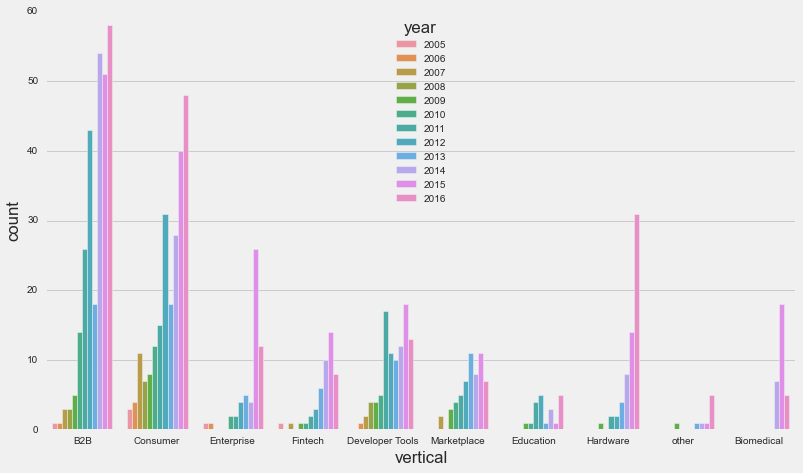

In [43]:
sns.countplot(df['vertical'],hue=df['year'])